In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

#These imports were constructed
from wrangle import get_zillow_data

#Tools to build machine learning models and reports
from sklearn.model_selection import train_test_split

#Removes warnings and imporves asthenics
import warnings
warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None


Target column = taxvaluedollarcnt
taxvaluedollarcnt - drop nulls because this is the target and we don't know the results.

In [2]:
master_df = get_zillow_data()

In [19]:
schema = pd.read_excel('zillow_data_dictionary.xlsx')
schema
#schema.loc[[4, 3, 11, 51, 50, 54]]

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (if any)
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
2,'basementsqft',Finished living area below or partially below ground level
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the building from best (lowest) to worst (highest)
6,'buildingclasstypeid',"The building framing type (steel frame, wood frame, concrete/brick)"
7,'calculatedbathnbr',Number of bathrooms in home including fractional bathroom
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + sink + toilet)


In [4]:
master_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
master_df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [6]:
master_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [20]:
null_df = master_df[master_df.taxvaluedollarcnt.isna() == True]

In [23]:
null_df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,493.000000,493.000000,115.000000,0.0,118.000000,31.000000,493.000000
mean,0.618661,0.345842,1611.104348,NaN,1941.262712,546.985806,6060.841785
std,1.333060,0.789005,1636.669116,NaN,27.056266,2350.568585,33.835075
min,0.000000,0.000000,400.000000,NaN,1895.000000,7.040000,6037.000000
25%,0.000000,0.000000,911.000000,NaN,1923.000000,18.650000,6037.000000
50%,0.000000,0.000000,1197.000000,NaN,1941.000000,50.060000,6037.000000
75%,0.000000,0.000000,1650.000000,NaN,1956.000000,97.700000,6111.000000
max,13.000000,8.000000,11449.000000,NaN,2011.000000,13155.860000,6111.000000


In [13]:
no_fips = master_df.drop(columns='fips')

In [15]:
no_fips.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
dtype: int64

In [16]:
master_df.columns[master_df.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt',
       'yearbuilt', 'taxamount'],
      dtype='object')

In [9]:
master_df[master_df.taxvaluedollarcnt.isna()].describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,493.000000,493.000000,115.000000,0.0,118.000000,31.000000,493.000000
mean,0.618661,0.345842,1611.104348,NaN,1941.262712,546.985806,6060.841785
std,1.333060,0.789005,1636.669116,NaN,27.056266,2350.568585,33.835075
min,0.000000,0.000000,400.000000,NaN,1895.000000,7.040000,6037.000000
25%,0.000000,0.000000,911.000000,NaN,1923.000000,18.650000,6037.000000
50%,0.000000,0.000000,1197.000000,NaN,1941.000000,50.060000,6037.000000
75%,0.000000,0.000000,1650.000000,NaN,1956.000000,97.700000,6111.000000
max,13.000000,8.000000,11449.000000,NaN,2011.000000,13155.860000,6111.000000


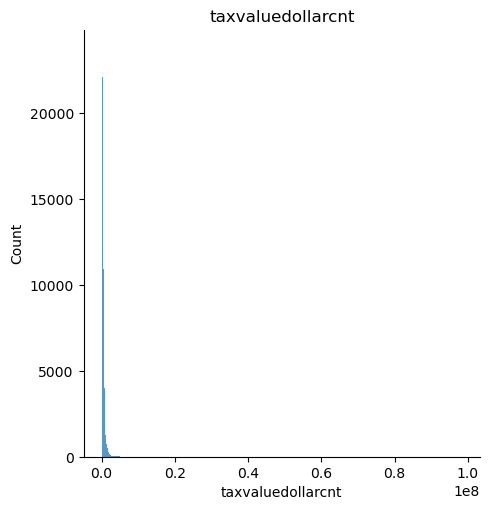

In [18]:
sns.displot(x='taxvaluedollarcnt', data=master_df)

plt.title('taxvaluedollarcnt')
plt.show()